In [1]:
import pandas as pd
data=pd.read_csv(("spreed.csv"))
print(data.tail())

                         time      timestamp  makerprice  takerprice
9995  2020-05-03 21:03:12.972  1588510992972    8937.035      8941.5
9996  2020-05-03 21:03:13.973  1588510993973    8937.355      8942.0
9997  2020-05-03 21:03:14.975  1588510994975    8936.405      8938.5
9998  2020-05-03 21:03:15.977  1588510995977    8936.310      8939.0
9999  2020-05-03 21:03:16.978  1588510996978    8936.740      8939.5


In [3]:
spreed=data['makerprice']-data["takerprice"]
print(data.corr())
print(spreed.describe())

            timestamp  makerprice  takerprice
timestamp    1.000000   -0.804334   -0.805905
makerprice  -0.804334    1.000000    0.999389
takerprice  -0.805905    0.999389    1.000000
count    10000.000000
mean        -1.332045
std          3.575885
min         -9.865000
25%         -4.235000
50%         -2.235000
75%          1.335000
max         26.010000
dtype: float64


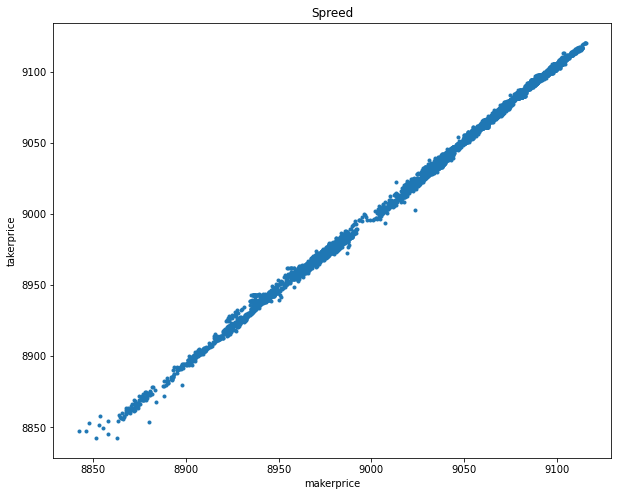

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize =(10,8))
plt.title('Spreed')
plt.plot(data['makerprice'], data['takerprice'], '.')
plt.xlabel('makerprice')
plt.ylabel('takerprice')
data.dropna(inplace = True)



In [21]:
import numpy as np
data=data[["makerprice","takerprice"]]
[slope, intercept] = np.polyfit(data.iloc[:,1], data.iloc[:,2], 1)     
slope,intercept

KeyError: "['time'] not in index"

In [8]:
data['spread'] = data.iloc[:,1] - (data.iloc[:,0]*slope + intercept)
data.head()


,makerprice,takerprice,spread
0,9096.930,9099.25,-2.061290
1,9096.760,9099.25,-1.882204
2,9097.955,9099.25,-3.141073
3,9097.235,9099.25,-2.382591
4,9097.110,9099.25,-2.250911


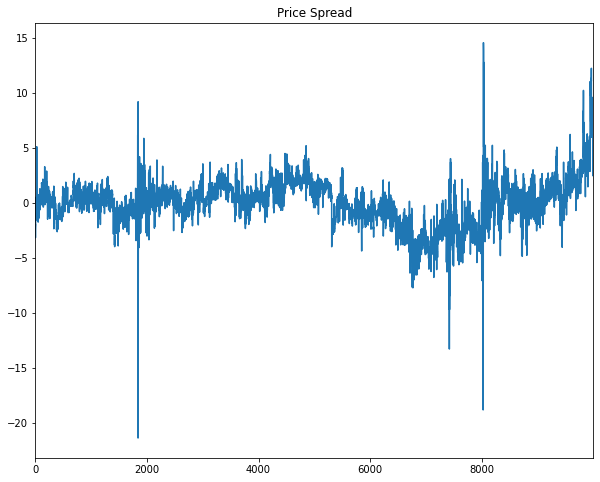

In [9]:
data['spread'].plot(figsize = (10,8),title = 'Price Spread')



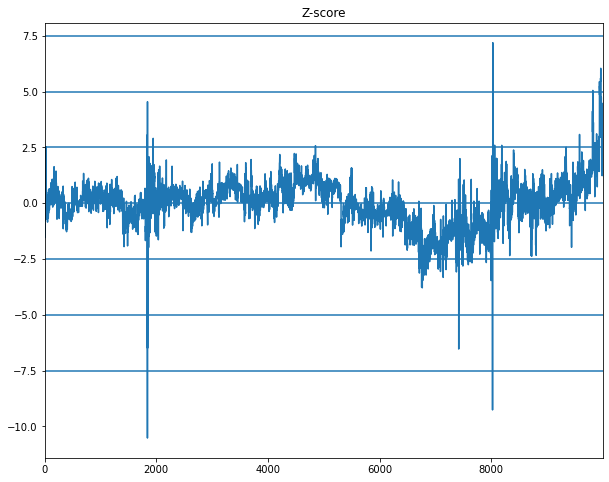

In [23]:
data['zscore'] = (data['spread'] - data['spread'].mean())/data['spread'].std()
data['zscore'].plot(figsize = (10,8),title = 'Z-score')
plt.axhline(2.5)
plt.axhline(5)
plt.axhline(7.5)
plt.axhline(0)
plt.axhline(-2.5)
plt.axhline(-5)
plt.axhline(-7.5)

In [22]:
data["t"]=np.where(abs(data['zscore']) >5, 1,0)
data[data['t']==1]


,makerprice,takerprice,spread,zscore,t
1841,9023.640,9002.75,-21.354198,-10.519937,1
1843,9007.340,8993.75,-13.183020,-6.494486,1
7419,8987.005,8972.25,-13.261186,-6.532994,1
8022,8897.890,8879.75,-11.883303,-5.854193,1
8025,8880.010,8854.00,-18.797680,-9.260494,1
8026,8862.965,8842.50,-12.341684,-6.080011,1
8030,8842.380,8847.75,14.593511,7.189351,1
8031,8846.110,8847.25,10.164156,5.007272,1
8032,8848.055,8853.00,13.865203,6.830557,1
8035,8853.565,8857.75,12.810713,6.311073,1


   makerprice  takerprice   spread    zscore  t
0     9096.93     9099.25 -2.06129 -1.015475  0
